In [1]:
import os
import pickle

In [2]:
import torch
import numpy as np
import pandas as pd
from tqdm.notebook import trange
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from lared_dataset.data_loading.utils import get_track_rectangle, tlwh_to_tlbr, enlarge_rectangle
from lared_dataset.constants import (
    processed_data_path, 
    processed_accel_path, 
    processed_videos_path,
    examples_path,
    vad_path)
from utils import load_vad, get_turns, get_turn_lengths_per_subject


# Dataset stats

In [4]:
examples = pickle.load(open(examples_path, 'rb'))
accel = pickle.load(open(os.path.join(processed_accel_path, 'subj_accel_interp.pkl'), 'rb'))
audio_segs = pickle.load(open('../preprocess/audio/valid_audio_segments.pkl', 'rb'))
audio_pids = set([el[1][0] for el in audio_segs])
video_pids = set([ex['pid'] for ex in examples])
accel_pids = set(list(accel.keys()))

In [5]:
union_pids = audio_pids | accel_pids | video_pids

In [6]:
df = pd.DataFrame({
    pid: {
        'Audio': pid in audio_pids,
        'Video': pid in video_pids,
        'Accel': pid in accel_pids
    } for pid in union_pids
})

In [11]:
vad = load_vad(vad_path)
tl_lared = get_turn_lengths_per_subject(vad)
speaking_times = {pid: np.sum(tls) for pid, tls in tl_lared.items()}

,1,2,3,4,5,7,9,10,11,12,...,25,26,27,29,30,31,32,33,34,35
0,2720.24,3270.41,3756.28,3146.24,3447.16,4404.55,4790.68,2821.47,2830.53,2626.93,...,4286.39,2735.35,1590.52,2050.18,4568.76,738.23,4887.19,2997.19,2299.24,2756.75


[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, ''),
  Text(12, 0, ''),
  Text(13, 0, ''),
  Text(14, 0, ''),
  Text(15, 0, ''),
  Text(16, 0, ''),
  Text(17, 0, ''),
  Text(18, 0, ''),
  Text(19, 0, ''),
  Text(20, 0, ''),
  Text(21, 0, ''),
  Text(22, 0, ''),
  Text(23, 0, ''),
  Text(24, 0, ''),
  Text(25, 0, ''),
  Text(26, 0, ''),
  Text(27, 0, ''),
  Text(28, 0, ''),
  Text(29, 0, ''),
  Text(30, 0, '')],
 Text(0, 0.5, 'Time(s)')]

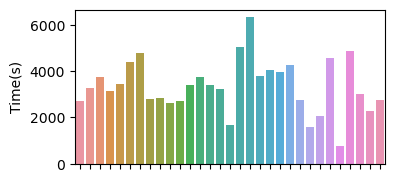

In [28]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.barplot(pd.DataFrame(speaking_times, index=[0]), ax=ax)
# sns.heatmap(df, ax=ax2)
ax.set(xticklabels=[], xlabel='Subject', ylabel='Time(s)')

In [12]:
speaking_times

{1: 2720.24,
 2: 3270.41,
 3: 3756.2799999999997,
 4: 3146.2400000000002,
 5: 3447.1600000000003,
 7: 4404.55,
 9: 4790.68,
 10: 2821.4700000000003,
 11: 2830.5299999999997,
 12: 2626.93,
 13: 2717.4300000000003,
 14: 3413.79,
 15: 3741.59,
 17: 3389.46,
 18: 3220.3999999999996,
 19: 1665.56,
 20: 5078.820000000001,
 21: 6367.75,
 22: 3801.7,
 23: 4052.6499999999996,
 24: 3981.84,
 25: 4286.389999999999,
 26: 2735.3500000000004,
 27: 1590.52,
 29: 2050.1800000000003,
 30: 4568.76,
 31: 738.2299999999999,
 32: 4887.1900000000005,
 33: 2997.1900000000005,
 34: 2299.24,
 35: 2756.75}

<AxesSubplot: >

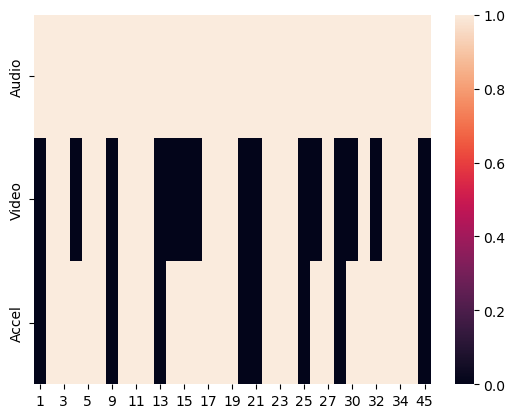

In [20]:
print(accel_pids)


{2, 3, 4, 5, 7, 10, 11, 12, 14, 15, 16, 17, 18, 19, 22, 23, 24, 26, 27, 30, 31, 32, 33, 34, 35}


In [37]:
intersection_pids = [pid for pid in video_pids if pid in accel_pids]

In [38]:
len(intersection_pids)

18

In [39]:
intersection_pids

[33, 2, 3, 35, 34, 5, 7, 10, 11, 12, 17, 18, 19, 22, 23, 24, 27, 31]

In [40]:
plt.hist(pids)

NameError: name 'pids' is not defined

(array([3929., 2224., 1900.,  825., 1119., 1503., 4902., 3167., 1496.,
        1974.]),
 array([ 1. ,  4.4,  7.8, 11.2, 14.6, 18. , 21.4, 24.8, 28.2, 31.6, 35. ]),
 <BarContainer object of 10 artists>)

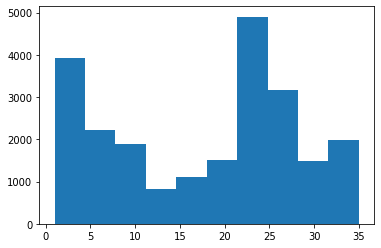

In [ ]:
ds[0]['video'].shape

torch.Size([3, 8, 256, 256])

  0%|          | 0/23039 [00:00<?, ?it/s]